In [1]:
import os
import sys

import numpy as np

import pyda
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'xx-large',
          'ytick.labelsize': 'xx-large'}
pylab.rcParams.update(params)

sys.path.insert(0, os.path.abspath('../'))

from pyda.tsdata import TSData
from pyda.xydata import XYData
from pyda.dsp.spectral import psd, tfe
import matplotlib.pyplot as plt
import numpy

FigSize = (15,10) # global setting for figure size

In [2]:

from scipy.signal import kaiserord, firwin
from pyda.dsp.filter import FIR

nyquist = 8
freq1=1.1 # Hz
freq2=2.9 # Hz
attenuation=240 #dB

numtaps, beta = kaiserord(attenuation, (freq2 - freq1) / nyquist)
taps = firwin(numtaps, (freq1 + freq2) / (2 * nyquist), window=('kaiser', beta))

f_aa = FIR(a=taps, fs=16, name="AA")

ts1 = TSData.sinewave(nsecs=5, fs=10, f0=0.2, name="TS1", yunits="m")
ts2 = TSData.sinewave(nsecs=5, fs=12, f0=0.3, name="TS2", yunits="m")

ts1d = ts1.resample(fsout=2)
ts2d = ts2.resample(fsout=5, filter=f_aa)

print(ts1)
print(ts1d)

resampling by 1.0/5.0
resampling by 5.0/12.0
-------- TSData ---------
  name: TS1
  uuid: e86ed119-3545-4ae8-a74e-dd81ed5fd5f5
    fs: 10.0
 nsecs: 4.9
 xaxis: Time=(50,)[s]
 yaxis: Amplitude=(50,)[m]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[m]

-----------------------------
-------- TSData ---------
  name: resample(TS1)
  uuid: e86ed119-3545-4ae8-a74e-dd81ed5fd5f5
    fs: 2.0
 nsecs: 4.5
 xaxis: Time=(10,)[s]
 yaxis: Amplitude=(10,)[m]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[m]

-----------------------------


In [3]:

ts1.marker="."
ts2.marker="."
ts1d.marker="o"
ts2d.marker="o"


[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:xlabel='Time $\\left[\\,{\\mathrm{s}} \\right]$', ylabel='Amplitude $\\left[\\,{\\mathrm{m}} \\right]$'>],
 []]

<Figure size 1080x720 with 0 Axes>

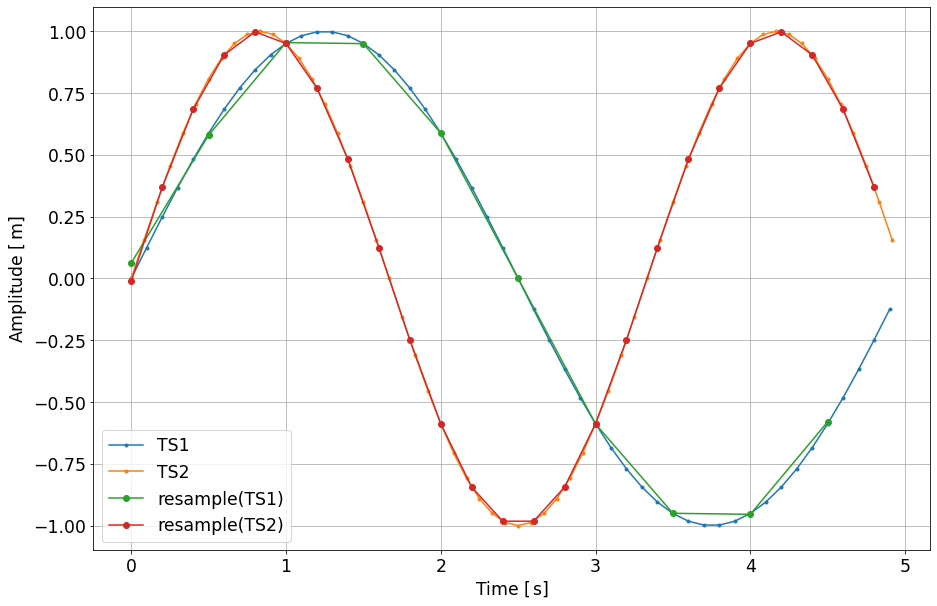

In [4]:

ts1.plot(ts2, ts1d, ts2d)
